**Tested ML**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the data
csv_file_path = r"C:\Users\olive\Downloads\0_DONE_FINAL_1.csv"
df = pd.read_csv(csv_file_path)

# Data preprocessing
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Feature selection
X = df[['cus_latitude', 'cus_longitude']]  # Add other features if necessary
y = df['barangay']  # Assuming 'barangay' is the target variable

# Encode categorical target variable
y = pd.factorize(y)[0]  # Convert categorical 'barangay' to numerical

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model and scaler
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load the model and scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

df.head()

Accuracy: 0.9827250417553528
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       199
           1       0.96      0.93      0.95       206
           2       0.94      0.95      0.94       160
           3       0.93      0.97      0.95        96
           4       0.99      0.91      0.95        82
           5       0.91      1.00      0.95       168
           6       0.96      0.98      0.97       251
           7       0.97      0.90      0.93       110
           8       0.98      0.97      0.97        90
           9       0.93      0.96      0.94       133
          10       1.00      1.00      1.00      2386
          11       0.98      0.95      0.97       261
          12       0.98      0.96      0.97       537
          13       0.98      0.99      0.98       330
          14       0.99      0.97      0.98       282
          15       0.99      1.00      0.99       478
          16       0.94     

,name,acct_id,delivery_address,sp_status,poleno,id 2,cus_latitude,cus_longitude,barangay,YES
0,"WONG,SALVADOR VILLOREJO",8941521111,BRGY 1-A ANDA EXT POBLACION DIS,INSERVICE,556511,8941521111_666554,7.064574,125.605886,1-A,1
4,"GARAY,MOISES LOPAGUE",2507811526,PRK7 MAGALLANES ST. 1-A,INSERVICE,740621,2507811526_811980,7.063739,125.606564,1-A,1
5,"DALUMPINES,DAVID PEGALAN",2064181831,PRK7 RIVERSIDE MAGALLANES 1-A,INSERVICE,731180,2064181831_819464,7.063440,125.606358,1-A,1
7,"SARENAS,DANICA JANE ALINON",1728916524,#392 BOLTON EXT. BRGY.1-A,INSERVICE,744925,1728916524_753484,7.060414,125.606592,1-A,1
8,"BEDICO,STEPHEN AGUSTIN",5415062789,"D#2 DOCTOR PAVINO BLDG. BROKENSHIRE DRIVE, A.P...",INSERVICE,731240,5415062789_671973,7.064325,125.606188,1-A,1


**Tested Predictor**

In [6]:
import pandas as pd
# Example new sample with latitude and longitude
new_sample = pd.DataFrame({
    'cus_latitude': [7.35067709196376],  # Replace with actual latitude 7.072952, 125.604465 		
  'cus_longitude': [125.676427655451]  # Replace with actual longitude
})

# Scale the new sample using the fitted scaler
new_sample_scaled = scaler.transform(new_sample)

# Predict using the trained model
y_pred_new = model.predict(new_sample_scaled)

# Convert the prediction back to the original class names
barangay_labels = df['barangay'].unique()  # Original labels from the training data
predicted_barangay = barangay_labels[y_pred_new[0]]

print("Predicted Barangay:", predicted_barangay)


Predicted Barangay: CEBULANO


**Using the Test Data to train the Model to add to Accuracy**

In [3]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_test_scaled, y_test)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model and scaler
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load the model and scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')



Accuracy: 0.9992824711933288
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00       168
           6       1.00      1.00      1.00       251
           7       1.00      1.00      1.00       110
           8       1.00      1.00      1.00        90
           9       1.00      1.00      1.00       133
          10       1.00      1.00      1.00      2386
          11       1.00      1.00      1.00       261
          12       1.00      1.00      1.00       537
          13       1.00      1.00      1.00       330
          14       1.00      1.00      1.00       282
          15       1.00      1.00      1.00       478
          16       1.00     

**Confusion Matrix**

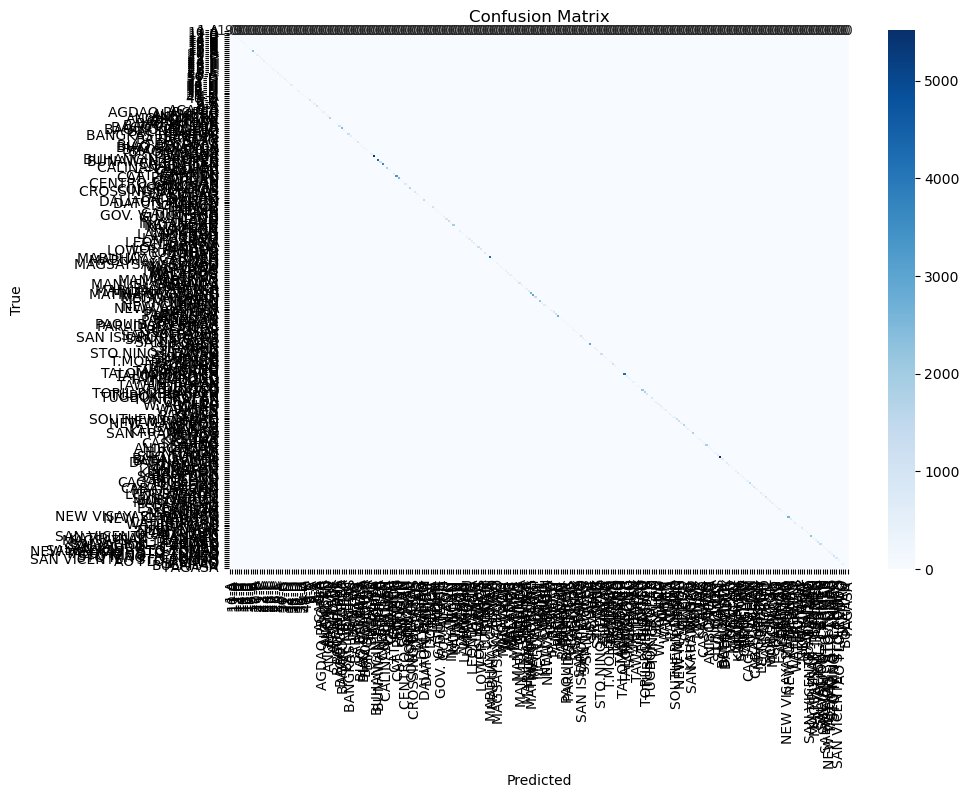

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['barangay'].unique(), yticklabels=df['barangay'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [5]:
import pandas as pd
import numpy as np
import joblib

# Load the new data
new_csv_file_path = r"C:\Users\olive\Downloads\for_ai_tagging.csv"  # Replace with your actual file path
new_df = pd.read_csv(new_csv_file_path)

# Preprocess the data
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
new_df.dropna(subset=['cus_latitude', 'cus_longitude'], inplace=True)  # Make sure necessary columns are not NaN

# Select features
X_new = new_df[['cus_latitude', 'cus_longitude']]

# Load the saved scaler and model
scaler = joblib.load('scaler.pkl')
model = joblib.load('random_forest_model.pkl')

# Scale the features
X_new_scaled = scaler.transform(X_new)

# Predict the 'barangay'
new_df['barangay'] = model.predict(X_new_scaled)

# Save the new DataFrame with the predicted 'barangay'
new_df.to_csv(r"C:\Users\olive\Downloads\new_data_with_predictions.csv", index=False)

In [11]:
import pandas as pd
import numpy as np
import joblib

# Extract unique barangay labels and create a mapping
unique_barangays = df['barangay'].unique()
barangay_to_id = {label: idx for idx, label in enumerate(unique_barangays)}
id_to_barangay = {idx: label for label, idx in barangay_to_id.items()}

# Load the scaler and model
scaler = joblib.load('scaler.pkl')
model = joblib.load('random_forest_model.pkl')

# Load the new data
new_csv_file_path = r"C:\Users\olive\Downloads\for_ai_tagging.csv"  # Replace with your actual file path
new_df = pd.read_csv(new_csv_file_path)

# Preprocess the new data
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
new_df.dropna(subset=['cus_latitude', 'cus_longitude'], inplace=True)  # Ensure necessary columns are not NaN

# Select features
X_new = new_df[['cus_latitude', 'cus_longitude']]

# Scale the features
X_new_scaled = scaler.transform(X_new)

# Predict the 'barangay' IDs
predicted_ids = model.predict(X_new_scaled)

# Map the predicted IDs to barangay names
new_df['barangay'] = [id_to_barangay.get(pred_id, 'Unknown') for pred_id in predicted_ids]

# Save the updated DataFrame with the predicted 'barangay'
new_df.to_csv(r"C:\Users\olive\Downloads\new_data_with_predictions.csv", index=False)

# Print all unique barangay IDs and their corresponding labels
print("Barangay IDs and Labels:")
for label, idx in barangay_to_id.items():
    print(f"ID: {idx}, Barangay: {label}")

# If you want to print out the reverse mapping (IDs to Labels)
print("\nReverse Mapping - Barangay IDs to Labels:")
for idx, label in id_to_barangay.items():
    print(f"ID: {idx}, Barangay: {label}")



Barangay IDs and Labels:
ID: 0, Barangay: 1-A
ID: 1, Barangay: 10-A
ID: 2, Barangay: 11-B
ID: 3, Barangay: 12-B
ID: 4, Barangay: 13-B
ID: 5, Barangay: 14-B
ID: 6, Barangay: 15-B
ID: 7, Barangay: 16-B
ID: 8, Barangay: 17-B
ID: 9, Barangay: 18-B
ID: 10, Barangay: 19-B
ID: 11, Barangay: 2-A
ID: 12, Barangay: 20-B
ID: 13, Barangay: 21-C
ID: 14, Barangay: 22-C
ID: 15, Barangay: 23-C
ID: 16, Barangay: 24-C
ID: 17, Barangay: 25-C
ID: 18, Barangay: 26-C
ID: 19, Barangay: 27-C
ID: 20, Barangay: 28-C
ID: 21, Barangay: 29-C
ID: 22, Barangay: 3-A
ID: 23, Barangay: 30-C
ID: 24, Barangay: 31-D
ID: 25, Barangay: 32-D
ID: 26, Barangay: 33-D
ID: 27, Barangay: 34-D
ID: 28, Barangay: 35-D
ID: 29, Barangay: 36-D
ID: 30, Barangay: 37-D
ID: 31, Barangay: 38-D
ID: 32, Barangay: 39-D
ID: 33, Barangay: 4-A
ID: 34, Barangay: 40-D
ID: 35, Barangay: 5-A
ID: 36, Barangay: 6-A
ID: 37, Barangay: 7-A
ID: 38, Barangay: 8-A
ID: 39, Barangay: 9-A
ID: 40, Barangay: ACACIA
ID: 41, Barangay: AGDAO PROPER
ID: 42, Barangay: 